# Sentiment Classification using LSTM model

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict
%matplotlib inline
from sklearn.svm import SVC
from nltk.stem.snowball import SnowballStemmer

## Text Cleaning

In [ ]:
## remove special symbol
def rating_class(df):
    df['Reviews'] = df['Reviews'].str.replace("&#039;",'\'')
    df['Reviews'].head()
    df['rating_cate'] = ''
    df.loc[df['Rating'] >= 7,'rating_cate'] = 'positive'
    df.loc[df['Rating'] <= 4,'rating_cate'] = 'negative'
    df.loc[(df['Rating'] > 4) & (df['Rating'] < 7),'rating_cate'] = 'neutral'
    return df

def clean_text(df):
    df['Reviews'] = df['Reviews'].str.replace("\"","").str.lower()
    df_tem3['Reviews'] = df['Reviews'].str.replace( r"(\\r)|(\\n)|(\\t)|(\\f)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(&#039;)|(\d\s)|(\d)|(\/)","")
    df_tem3['Reviews'] = df['Reviews'].str.replace("\"","").str.lower()
    df['Reviews'] = df['Reviews'].str.replace( r"(\$)|(\-)|(\\)|(\s{2,})"," ")
    df['Reviews'].sample(1).iloc[0]

    stemmer = SnowballStemmer('english')
    df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split(" ")]))
    return df

np.random.seed(9)

## Splitting data to train and test

In [4]:
df = pd.read_csv('full_merge.csv')
df['Reviews'] = df['Reviews'].astype(str)

print(len(df))
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train_generated = df[msk]
del train_generated['split']
print(len(train_generated))
test_generated = df[~msk]
del test_generated['split']

337353
235938
101415


In [5]:
df_train = rating_class(train_generated)
df_train = clean_text(df_train)


df_test = rating_class(test_generated)
df_test = clean_text(test)


/Users/akash/opt/anaconda3/envs/draw/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/akash/opt/anaconda3/envs/draw/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [6]:
df_train.groupby('rating_cate').size()

rating_cate
negative     50511
neutral      35969
positive    149458
dtype: int64

In [7]:
print(df_train.shape)
print(df_test.shape)

(235938, 6)
(101415, 6)


## LSTM Model

In [8]:
import tensorflow as tf
import tensorflow 

#from tensorflow import tensorflow.keras

#from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional



# fix random seed for reproducibility

MAX_NB_WORDS = 500
max_review_length = 500
EMBEDDING_DIM = 160

/Users/akash/opt/anaconda3/envs/draw/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/akash/opt/anaconda3/envs/draw/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/akash/opt/anaconda3/envs/draw/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/akash/opt/anaconda3/envs/draw/lib

In [10]:
# Tokenize the data
tokenizer = Tokenizer(num_words = MAX_NB_WORDS, 
                      filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                      lower=True, split=' ', char_level=False, 
                      oov_token=None)

tokenizer.fit_on_texts(df_train['Reviews'])
train_sequences = tokenizer.texts_to_sequences(df_train['Reviews'])
test_sequences = tokenizer.texts_to_sequences(df_test['Reviews'])

In [11]:
# truncate and pad input sequences
X_train = sequence.pad_sequences(train_sequences, maxlen=max_review_length)
X_test = sequence.pad_sequences(test_sequences, maxlen = max_review_length)

In [12]:
# transform y to get_dummies
y_train = pd.get_dummies(df_tem3['rating_cate'])
y_test = pd.get_dummies(test['rating_cate'])

word_index = tokenizer.word_index
y_train.head()

,negative,neutral,positive
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
5,0,0,1


In [13]:
# Print shapes of data. 

print(X_train.shape, '<-- shape of train_data ready for val/train split.')
print(X_test.shape, '<-- shape of final_test_data ready for fedding to network.')
print(len(tokenizer.word_index), '<-- Length of Word Index')

(235938, 500) <-- shape of train_data ready for val/train split.
(101415, 500) <-- shape of final_test_data ready for fedding to network.
102541 <-- Length of Word Index


In [14]:
# Split Training & Validation Data
from sklearn.model_selection import train_test_split


print('creating train and validation data by dividing train_data in 80:20 ratio')
######################################################

X_train_t, X_train_val, Y_train_t, y_train_val = train_test_split(X_train, y_train, test_size = 0.2)

######################################################
print('train data shape:', X_train_t.shape)
print('validation data shape:', X_train_val.shape)
print('Data is ready for training!!')

creating train and validation data by dividing train_data in 80:20 ratio
train data shape: (188750, 500)
validation data shape: (47188, 500)
Data is ready for training!!


In [15]:
nb_words  = min(MAX_NB_WORDS, len(word_index))
lstm_out = max_review_length

model = Sequential()
model.add(Embedding(nb_words,EMBEDDING_DIM,input_length=max_review_length))
#model.add(Dropout(0.2))

## add conv using kernal No.32 and size 3x3, actiation='relu'(rm neg)
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool1D(pool_size=2))
model.add(Bidirectional(LSTM(40, return_sequences=True)))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(40)))
#model.add(Bidirectional(LSTM(20)))
#model.add(Attention(max_review_length))
model.add(Dense(3, activation = 'softmax'))

## one-code mutiple categories targets use 'categorical_crossentropy' not 'binary_crossentropy'
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 160)          80000     
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 80)           64320     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 80)                38720     
_________________________________________________________________
dense (Dense)                (None, 3)                 243       
Total params: 183,283
Trainable params: 183,283
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Run LSTM Model
batch = 32 
epoch = 40

## set name for the mdoel
training_cycle = 1
notebookname = "Drug_Data_"
variant = "LSTM_w_stopwords_"
version = "1.0_"
title = notebookname + variant + version

stamp = '{}trainging_cycle{}batchsize_{}'.format(title,training_cycle,batch)
print(stamp)

## save the best model
best_model_path = title + stamp + 'best.h5'
model_checkpoint = ModelCheckpoint(best_model_path, save_best_only = True) ## save only best model

## if 4 steps without decreasing of loss in valid set, stop the trainning
early_stopping = EarlyStopping(patience = 4)

LSTM_model = model.fit(X_train_t, Y_train_t, batch_size=batch, epochs=epoch,
                       validation_data=(X_train_val, y_train_val),callbacks=[model_checkpoint], shuffle = True)

best_score = min(LSTM_model.history['val_loss'])

## why difference between train and val loss could be randomly different? local optima?
## add dropout to avoid overfitting

Drug_Data_LSTM_w_stopwords_1.0_trainging_cycle1batchsize_32
Train on 188750 samples, validate on 47188 samples
Epoch 1/12
188750/188750 [==============================] - 5444s 29ms/sample - loss: 0.7028 - acc: 0.7087 - val_loss: 0.6659 - val_acc: 0.7236
Epoch 2/12
188750/188750 [==============================] - 4274s 23ms/sample - loss: 0.6500 - acc: 0.7273 - val_loss: 0.6389 - val_acc: 0.7313
Epoch 3/12
188750/188750 [==============================] - 4272s 23ms/sample - loss: 0.6231 - acc: 0.7374 - val_loss: 0.6156 - val_acc: 0.7405
Epoch 4/12
188750/188750 [==============================] - 4269s 23ms/sample - loss: 0.6026 - acc: 0.7451 - val_loss: 0.6100 - val_acc: 0.7407
Epoch 5/12
188750/188750 [==============================] - 4263s 23ms/sample - loss: 0.5852 - acc: 0.7521 - val_loss: 0.6002 - val_acc: 0.7475
Epoch 6/12
188750/188750 [==============================] - 4684s 25ms/sample - loss: 0.5678 - acc: 0.7595 - val_loss: 0.6016 - val_acc: 0.7448
Epoch 7/12
188750/188750 

In [21]:
LSTM_model_history = pd.DataFrame(LSTM_model.history)
file_name = str(LSTM_model.params['samples']) + "_20_bilstm_2layer.csv"
LSTM_model_history.to_csv(file_name)
model.save('bilstm_2layer_40.h5')

Text(0.5, 0, 'epoch')

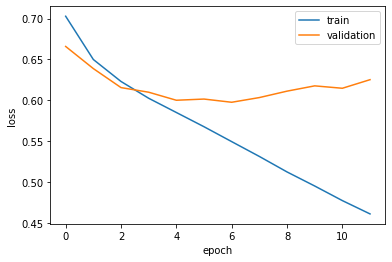

In [22]:
plt.plot(LSTM_model.history['loss'],label='train')
plt.plot(LSTM_model.history['val_loss'],label='validation')
plt.legend()
plt.ylabel("loss")
plt.xlabel("epoch")


In [23]:
LSTM_model.history['val_acc']

[0.7235526,
 0.7312876,
 0.7404637,
 0.74067557,
 0.7474782,
 0.7448292,
 0.7479868,
 0.7463762,
 0.7476053,
 0.7481775,
 0.74726623,
 0.74722385]

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
accr = model.evaluate(X_test,y_test, batch_size = 100)
accr

101415/101415 [==============================] - 230s 2ms/sample - loss: 0.6325 - acc: 0.7447


[0.6325038926127582, 0.744732]

In [28]:
X_test

array([[  0,   0,   0, ...,  35,  26,   9],
       [  0,   0,   0, ..., 223,  19,  31],
       [  0,   0,   0, ...,  63,   5, 130],
       ...,
       [  0,   0,   0, ...,  62, 131, 206],
       [  0,   0,   0, ...,   5,   6, 321],
       [  0,   0,   0, ...,  22, 398, 344]], dtype=int32)

In [25]:
y_test_pred = model.predict_classes(X_test)
confusion_matrix(y_test.values.argmax(axis=1),y_test_pred)

array([[15217,  2575,  3793],
       [ 5966,  3581,  5750],
       [ 4525,  3279, 56729]])

In [26]:
y_test.sum()

negative    21585
neutral     15297
positive    64533
dtype: int64

In [ ]:
## load the model
# from tensorflow.keras.models import load_model
# LSTM_model2 = load_model("model_report/0403/129037_40_bilstm_2layer.h5")
# LSTM_model2.evaluate(X_test,y_test, batch_size = 100)
# y_test_pred2 = LSTM_model2.predict_classes(X_test)
# confusion_matrix(y_test.values.argmax(axis=1),y_test_pred2)

In [224]:
text_my = ["I was prescribed Ativan after I was catatonic when I had a psychotic episode. It helped with my anxiety. I had never had any withdrawals and I used it as prescribed."]
test_sequences_my = tokenizer.texts_to_sequences(text_my)
X_test_my = sequence.pad_sequences(test_sequences_my, maxlen = max_review_length)

In [225]:
y_test_pred_my = model.predict_classes(X_test_my, verbose=1)
# labels = np.argmax(y_test_pred_my, axis=-1)    
print(y_test_pred_my)


1/1 [==============================] - 0s 139ms/sample
[2]
